In [1]:
import numpy as np


In [21]:
d = 20

pi = np.random.uniform(size=d)
pi = pi/np.sum(pi)
print(pi)

r = np.random.uniform(size=d)
tau = 1


[0.09240203 0.09863945 0.07139563 0.06700409 0.05727818 0.00784492
 0.01771459 0.02072094 0.049059   0.02840108 0.06617825 0.07571291
 0.01232533 0.08359733 0.0195634  0.04779977 0.07471281 0.0304686
 0.07137126 0.00781044]


In [42]:
taus = [0.1, 0.2, 0.5, 0.7 , 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 20, 30, 40, 50]
diffs = []
terms = []
for tau in taus:
    eta = 0.5/tau
    exp = np.exp(r/tau)
    xi = np.sum(exp)*pi

    new_xi = xi**(1-eta*tau) * np.exp(eta*r)

    new_pi = new_xi/np.sum(new_xi)

    # diff = np.sum(np.abs(new_pi - pi))
    diff = np.sum(np.abs(tau*np.log(xi) - r))
    diffs.append(diff)
    
    # term = tau* np.log(xi) - r
    
    V_0 = pi.T@r + tau*pi.T@np.log(pi)
    V_1 = new_pi.T@r + tau*new_pi.T@np.log(new_pi)
    
    
    terms.append(np.sum(np.abs(V_1-V_0)))
    # terms.append(np.sum(np.abs(term)))
    
    

[0.3809613297731091, 0.2282568863062041, 0.044374346823294664, 0.012570392282295728, 0.07465042006806843, 0.22956364768819615, 0.3656059651169663, 0.49691985278684037, 0.6263431671072262, 0.7548217058239217, 0.8827606209689627, 1.0103623972766513, 1.1377394825936342, 1.2649593235152707, 1.3920648287147301, 1.5190845972307017, 1.6460384243896442, 1.7729404472306527, 1.899801031327165, 2.026627949810326, 2.533700000199765, 3.8005556440932793, 5.066940288137758, 6.333136576029517]


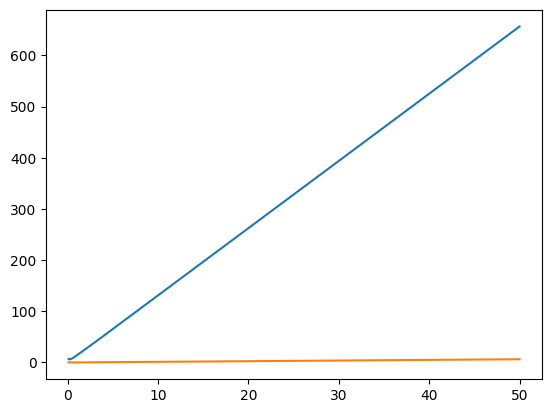

In [45]:
import matplotlib.pyplot as plt

plt.plot(taus, diffs)
plt.plot(taus, terms)
print(terms)

In [176]:
# centralized retraction free


import numpy as np
import matplotlib.pyplot as plt
from update_utils import *
from retraction_free import *
from RDGD_tracking import *
from ret_free_destiny import *
from ret_deepca import *
import time

m = 500
# number of samples ?
n = 100
# problem dim
# n_r_ratio = 100
# r = int(n/n_r_ratio)
r = 100
# r = 100
eig_rank = r


A = data_gen_pca(1, n, m)/np.sqrt(m)
B = np.zeros((m, n))
for i in range(1):
    B[m*i:m+m*i] = A[i].T
print(np.linalg.norm(A))
print(np.linalg.norm(B))

U, S, V = np.linalg.svd(B, full_matrices=False)
print(U.shape, S.shape, V.shape)
for i in range(min(n,m)):
    if eig_rank >= i:
    # if True:
        S[i] = S[0] * 0.9**(i)
    else:
        S[i] = 0
        break
B = U@np.diag(S)@V
print(np.linalg.norm(B))
print(B.shape)
A = B.T@B
    
print(A.shape)
 



10.022717285937777
10.022717285937778
(500, 100) (100,) (100, 100)
3.324685565350664
(500, 100)
(100, 100)


In [177]:
x_0 = np.random.randn(n, r)
x_0, _ = np.linalg.qr(x_0)

lin_term = np.random.randn(*x_0.shape)
print(lin_term.shape)
lin_term = A@lin_term
print(lin_term.shape)

# A = np.random.randn(*A.shape)/n/r
# A = 0
# lin_term = None
step_size = .01

penalty_norm = []
x = x_0
lambd=0.1
for iter in tqdm(range(10000)):

    diff = (A@A.T@x )
    # diff = np.zeros_like(A@A.T@x)
    if lin_term is not None:
        diff += lin_term 
    grad = proj_tangent(x , diff )
    
    penalty = lambd * x  @ (x.T@x - np.eye(r))
    # y[i] = proj_tangent(x[i], diff[i])
    Lam = step_size * grad - penalty
    x += Lam
    penalty_norm.append(np.linalg.norm(Lam))    
    # penalty_norm.append(np.linalg.norm(grad))

(100, 100)
(100, 100)


100%|██████████| 10000/10000 [00:02<00:00, 4251.11it/s]


(10000,)


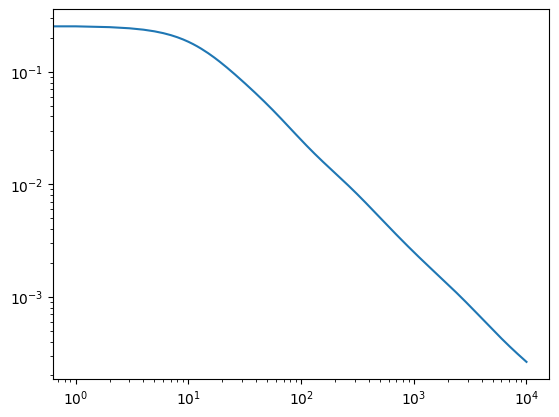

In [184]:
penalty_norm = np.array(penalty_norm)
print(penalty_norm.shape)
run_len = (penalty_norm.shape[0])
# plt.plot(penalty_norm*np.linspace(1,run_len, run_len))
plt.plot(penalty_norm)

# plt.plot(np.log(penalty_norm))
plt.xscale('log')
plt.yscale('log')
